## Lab 2 - Properties of a CCD

### 1. Introduction

Charge Coupled Devices are made with integrated circuit tehcnology with a photoactive region, which consists of a layer of p-doped silicon and a transmission region. When the image is projected through the telescope lens onto a capacitor array, the charge accumulated is proportional to the intensity of light (ideally), and this number is known as the gain of a CCD, showing the number of photons per digital unit of the output signal. However the conversion of small packets of charge into voltage are not perfect, and the 1:1 ratio for photons and DU of output signal are not only unlikely, they are also undesirable. Electrons are released when photons penetrate the layer of silicon of the photon diode. The electrons are stored in a potential well determined by the electric field generating the positive charge. The applied positive voltage transfers the photons down the rows in a shuffling process, until the last capacitor row in the array dumps the charge into a charge amplifier, where it is converted into a potential difference that is digitized and used for further analysis. 

Every frame taken by the CCD is subjected to different regiemes of noise: readout noise, given in units of e-, occurs when charges are amplified, quantified, and transposed into ADUs. It is therefore noise due to a combination of A/D conversion and electronic noise, affected by the size of the amplifier, the construction of the integrated circuit, the temperature of the amplifer, readout speed, and the overral temperature of the CCD.

When pixels are saturated, the number of electrons exceeds the storage capacity of the potential well, resulting in blotting or 'blossoming' on the final image. When the responsivity of a CCD becomes nonlinear (the number of ADU counts is not exactly proportional to the number of incident photons), an effective saturation point occurs. The A/D converter itself provides a different form of saturation when a signal being digitized exceeds what the digitizer can handle, causing the digitizer to become 'pegged'. This value is determined by the bit depth, b, of the CCD. For example, if 14 bits are used, the range of possible DUs possible is between 0 and (2^14-1). 

Noise due to dark current occurs from the extra charge from thermally ionized electrons, which can be reduced by cooling the CCD. Dark current may not be linear with signal level. Noise due to cosmic rays, appearing as bright spots on the image, can be compensated by averaging multiple images, as this noise is random and varies from frame to frame. 

The quantum efficiency refers to the coversion success of photons into electrons, and ranges from 70 and up to 95% in most modern devices. This is primarily a function of wavelength, and may be difficult to measure directly as a calibrated light source is needed. In low-light imaging this feature is particularly imported, for wavelengths in the 375-550 nm range, photons have a high absorption coefficient in silicon. 

All of these properties can be studied for the Princeton Instrument Pixis 2048x2048 CCD on the UVic 0.8m telescope by obtaining a set of bias, flat-field, and science frames. The gain and readout noise can be obtained from the number of exposures of a flat-field source at different exposure times, allowing us to observe the trend in noise with increasing signal level. 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress as lin
import statistics as stat

In [2]:
time = np.array([1,2,2.5,3,4,5,6,7,8,9,10,15,20,25])
sigma = np.array([31.89,48.95,55.29,61.88,76.16,89.84,102.3,115.3,128.3,140.8,152.9,220.4,113.6,176])
mean = np.array([2679,5336,6611,7915,10534,13125,15711,18256,20864,23265,25849,38712,51233,55000])
signal = np.array([3157,4567,5558,6533,8428,10316,12333,14280,10056,17866,19823,29637,39800,49132]) 
#signal in DU from the pixis log sheet for flats exposures 0-25s)

In [3]:
fsigma = np.array([30.99,45.3,51.63,57.55,69.14,79.81,90.57,99.62,109.5,118.9,173.6,280.8,370.6])
fmean = np.array([2679,5336,6611,7915,10534,13125,15711,18256,20864,23265,38712,51233,55000])

### Saturation of the CCD

From the graph, the signal tapers off due to saturation as the signal approaches 50000 DU. However examining the raw data for the flats, the **maximum counts occur at around 64000 counts**; from the graph, the saturation may begin to occur slightly before the second to last point. As described above, pegging occurs when the A/D converter cannot digitize the incoming signal efficiently and depends on the bit depth of a CCD. Since the signal to noise curve does not follow a trend of 2^b-1 around the region of of saturation, this is an effect of **true saturation**. The maximal value is around 64000, which is where saturation occurs based on the raw data for the flat frames. 

The linearity of the detector appears to break down as it approaches the point of saturation. The transfer function between the incident photonic signal and the final digitzed output  varies linearly with the amount of incoming light on the pixel array, so the nonlinearity of the device can be determined by the diviation of the digital signal by some constant from the amount of incident light. Linearity can be calculated by finding the ratio between observed light and incident light. 

**Calculated beneath, the saturation charge in electrons for the CCD is = 134585.52555170536 e-.**


In [4]:
print(64895, 64987, "= maximum signal at 20s, 25s of exposure, the CCD becomes saturated.")

64895 64987 = maximum signal at 20s, 25s of exposure, the CCD becomes saturated.


Text(0.5, 1.0, 'Signal vs Exposure Time')

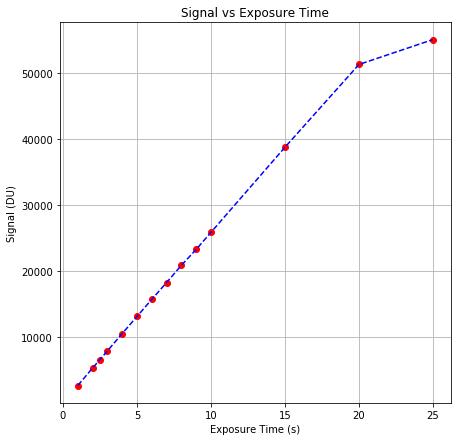

In [5]:
plt.figure(figsize=(7,7))
plt.grid(True)
plt.plot(time,(mean),'ro')
plt.plot(time,(mean),'b--')
plt.xlabel('Exposure Time (s)')
plt.ylabel('Signal (DU)')
plt.title('Signal vs Exposure Time')
#signal tapers off due to saturation

In [6]:
slope, intercept = np.polyfit((time), (mean), 1)

print("slope=",slope, "intercept=",intercept)

slope= 2323.227259097725 intercept= 1579.342646858397


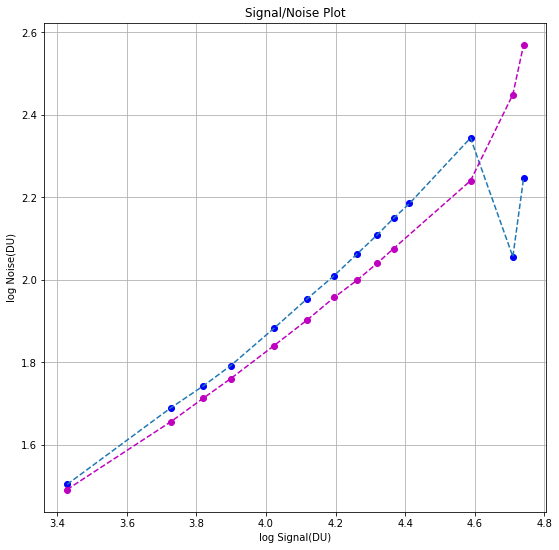

In [7]:
plt.figure(figsize = (9,9))
plt.plot(np.log10(mean),np.log10(sigma), 'bo')
plt.plot(np.log10(mean),np.log10(sigma), '--')
plt.title('Signal/Noise Plot')
plt.xlabel('log Signal(DU)')
plt.ylabel('log Noise(DU)')
plt.plot(np.log10(fmean),np.log10(fsigma), 'mo')
plt.plot(np.log10(fmean),np.log10(fsigma), 'm--')

plt.grid(True)
plt.show()

In [8]:
#note change in slopes after 4 points
#different noise dominates different regions
slope1, intercept1 = np.polyfit(np.log10(mean)[0:3],np.log10(sigma)[0:3], 1)
print("Blue curve is the noise before flat-field normalization:")
print("Slope =",slope1, "Intercept = ", intercept1)
# the first four points of the blue curve should be the noise before flat-field normalization
# the first four points of the magneta curve should be the noise after flat-fielding 
slope2, intercept2 = np.polyfit(np.log10(fmean)[0:3],np.log10(fsigma)[0:3], 1)
print("Magenta curve is the noise after flat-field normalization:")
print("Slope =",slope2,"Intercept = ",intercept2)

Blue curve is the noise before flat-field normalization:
Slope = 0.6123195369650678 Intercept =  -0.594810713929278
Magenta curve is the noise after flat-field normalization:
Slope = 0.5616341446134246 Intercept =  -0.4346562552795296


###  Examining noise regiemes in Signal/Noise plot

After 4 points, there is a distinct change in slope marking a different noise region. The first four points of the curve represents a readout noise dominated region, and with higher signal levels photon noise dominates. The readout noise regime is quite low, and there is no 'flat' line for the log plot--this is expected for the Pixis CCD as it has a low readout noise.

In [9]:
b_sig = [2.325,3.044,2.113,1.937,2.104,2.097,1.981,2.046,2.155,2.099,2.113] # bias - bias sigma values
bsig = np.mean(b_sig)/np.sqrt(2)
print('Noise from a single readout (DU)=',bsig)

Noise from a single readout (DU)= 1.5436783857648866


In [10]:
sig_ro = np.sqrt(bsig**2)*(1+(1/16))
print('Readout noise (total) (DU) = ',sig_ro)

Readout noise (total) (DU) =  1.6401582848751919


In [11]:
Ntpht = np.sqrt(sig_ro/2.06)
print("Total readout noise when photon noise dominates (DU)=",Ntpht)

Total readout noise when photon noise dominates (DU)= 0.892296667130626


## Examining Poisson noise

The Poisson noise is derived from $\sqrt{Signal/gain}$, and values should be similar to the flat-field subtracted sigma values. It is evident that the last few points have not been flat-fielded well, since the Poisson noise values are **not** exceeded by the fsigma values. 

**Q: Why can't we take the square root of the signal when calculating Poisson noise?**

When calculating the Photon noise, we cannot simply take the square root of the signal; we must account for the RQE of the detector. The gain factors in the disproportion in the input vs the output signal, so the standard deviation of the counts/pixel will not be equal to the square root of the number of counts.



In [12]:
Np = np.sqrt(fmean/2.06)
print("Poisson noise (counts) =",Np) # Poisson noise 

Poisson noise (counts) = [ 36.06224392  50.89490409  56.65000707  61.98574844  71.50938563
  79.82079443  87.33097405  94.13891821 100.63873678 106.27177104
 137.08476578 157.70348236 163.39837553]


In [13]:
fsigma  #flat- fielding didn't work well for last points, since Poisson noise is smaller than the fsigma values

array([ 30.99,  45.3 ,  51.63,  57.55,  69.14,  79.81,  90.57,  99.62,
       109.5 , 118.9 , 173.6 , 280.8 , 370.6 ])

In [14]:
Nt = np.sqrt((sig_ro**2)+(Np**2)) #Total readout noise in quadrature
print(Nt)
print("For the calculation of the gain, I will be using sigma/fsigma values in place of Nt^2")

[ 36.09952293  50.92132541  56.67374542  62.00744414  71.52819271
  79.83764364  87.34637456  94.15320516 100.65210112 106.28442708
 137.09457731 157.71201117 163.4066071 ]
For the calculation of the gain, I will be using sigma/fsigma values in place of Nt^2


In [15]:
mean[0:3]
fmean[0:3]
signal[0:3]

array([3157, 4567, 5558])

## Examining RMS variation

In [16]:
alpha = ((sigma[0:3]**2)-(fsigma[0:3]**2))**0.5/signal[0:3]
print('RMS variation alpha (sensitivy of the CCD) for first three points=',alpha)

RMS variation alpha (sensitivy of the CCD) for first three points= [0.00238288 0.00406122 0.00355919]


In [17]:
#plt.plot(mean,sigma)
lin(np.log10(mean),np.log10(sigma))

LinregressResult(slope=0.5766824249408256, intercept=-0.434189515686499, rvalue=0.9354619700668114, pvalue=9.068855092442629e-07, stderr=0.06289558047032076)

In [18]:
flatsig= np.mean(sigma)# plug into equation
print(flatsig)

108.115


# Calculating Gain

We calculate gain using the formula $\ g = (Signal) / (Nt^2 - nr^2) $ where g is the gain, signal is in DU, Nt is the total noise obtained by the photon noise and readout noise added in quadrature, and nr is the readout component of noise.

In [19]:
gain = np.array([])
for i in range(0,4):
    gain = (((sigma[i]**2)-(sig_ro**2))/mean[i])**-1

    #g = np.mean(gain)
    # should output four values of gain
    # BEFORE FLAT FIELDING (ie for blue graph)

In [20]:
sigma #total noise

array([ 31.89,  48.95,  55.29,  61.88,  76.16,  89.84, 102.3 , 115.3 ,
       128.3 , 140.8 , 152.9 , 220.4 , 113.6 , 176.  ])

In [21]:
print('Gain before flat fielding (in # electrons per pixel/ counts per pixel) =', gain)

Gain before flat fielding (in # electrons per pixel/ counts per pixel) = 2.068500001349569


In [22]:
fgain=np.array([])
for i in range(0,4):
    fgain = (((fsigma[1]**2)-(sig_ro**2))/fmean[1])**-1
    

In [23]:
fmean

array([ 2679,  5336,  6611,  7915, 10534, 13125, 15711, 18256, 20864,
       23265, 38712, 51233, 55000])

In [24]:
print('Gain after flat-fielding (in # electrons per pixel/ counts per pixel)=',fgain)

Gain after flat-fielding (in # electrons per pixel/ counts per pixel)= 2.6036890359901865


After dividing by highest flat field value (flat 16) and normalizing (multiplying by mean)

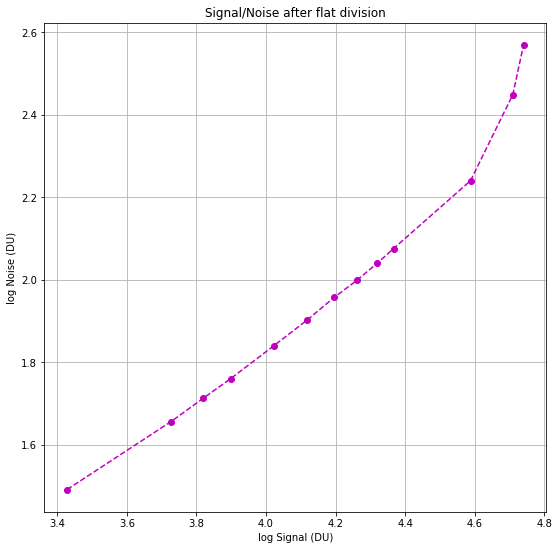

In [25]:
plt.figure(figsize = (9,9))
plt.plot(np.log10(fmean),np.log10(fsigma), 'mo')
plt.plot(np.log10(fmean),np.log10(fsigma), 'm--')
plt.title('Signal/Noise after flat division')
plt.xlabel('log Signal (DU)')
plt.ylabel('log Noise (DU)')
plt.grid(True)
plt.show()

In [26]:
print('Gain before flat-fielding =', gain)
print('Gain after flat-fielding =',fgain)
print('Readout noise (total)= ',sig_ro)
print('RMS variation alpha=',alpha) #didn't take out full flatfield noise
saturation = 64987*gain
print('Saturation charge in electrons=',saturation)

Gain before flat-fielding = 2.068500001349569
Gain after flat-fielding = 2.6036890359901865
Readout noise (total)=  1.6401582848751919
RMS variation alpha= [0.00238288 0.00406122 0.00355919]
Saturation charge in electrons= 134425.60958770444


## Examining Dark Current

Dark current occurs as a result of thermal energy within the CCD's silicon lattice. Stray electrons are created by the electronics even when the device is not collecting light, and get captured by the potential well of the CCD, causing false signal counts. This noise is considered random. One way to minimize this type of noise is maintaining the CCD at low temperatures using thermoelectric coolers, or liquid nitrogen. 


In [29]:
# Dark current minimum difference
DC = abs(-303.5 -(-119.1))
print("Dark current=",DC,"e-/pix/min")

Dark current= 184.4 e-/pix/min


In [30]:
# (n_bins/width x 10^2)/2 /exposure time = cosmic rays/ chip area / exposure time 

cos_s = ((512/2.73)*10e2)/2/1800 # per one second 
cos_h = ((450/2.539)*90)/2 #half an hour
cos_min = (())
print("Cosmic rays per second =",cos_s)
print("Cosmic rays for full half hour =",cos_h)

Cosmic rays per second = 52.09605209605209
Cosmic rays for full half hour = 7975.580937376919


Observation of faint objects are made in integrating mode (open shutter and stare for long time) is preferred if readout noise dominates the frames, at the expense of exposing the CCD to more cosmic rays. Averaging a number of different frames will result in 10 different readouts, which may complicate processing and increase noise over the signal. 